# <a> Unsupervised Learning - Clustering (K-Means) </a>

*Andraws Steve Santos - Data Scientist*

# Warning

Let's leverage the principal components we created in PCA project to segment the customers and assess which clusters will be used!

We've seen that clustering is a way to group observations that share common characteristics. It's quite different from PCA, which aims to reduce the number of dimensions.

A simple way not to confuse them:

- PCA reduces the number of features, meaning it transforms a large number of columns into a small number of components.
- Clustering groups rows (observations) whose features have close values (distances).
  
In the first part, we reduced the dimensionality of the questionnaire because if we created a cluster with 30 variables, interpreting the clustered groups would be very difficult. Therefore, we're using clustering with the reduced dimensionality, i.e., the principal components instead of the questionnaire variables. Instead of 30, we'll have only 5 variables to understand the clustering results.

The PCA project starts at cell 1 and ends at cell 19. The clustering project begins right at cell 20.

In [1]:
# Importing libraries for data reading and chart creation
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

# Configuring pandas to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 

# Configuring pandas to not show scientific notation for numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Importing data
df_microvan = pd.read_csv('./data/microvan.csv')

In [3]:
# First visualization of the data
df_microvan.head()

,subjnumb,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
0,1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
1,2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
2,3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
3,4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
4,5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [4]:
# Columns
df_microvan.columns

Index(['subjnumb', 'mvliking', 'kidtrans', 'miniboxy', 'lthrbetr', 'secbiggr',
       'safeimpt', 'buyhghnd', 'pricqual', 'prmsound', 'perfimpt', 'tkvacatn',
       'noparkrm', 'homlrgst', 'envrminr', 'needbetw', 'suvcmpct', 'next2str',
       'carefmny', 'shdcarpl', 'imprtapp', 'lk4whldr', 'kidsbulk', 'wntguzlr',
       'nordtrps', 'stylclth', 'strngwrn', 'passnimp', 'twoincom', 'nohummer',
       'aftrschl', 'accesfun', 'age', 'income', 'miles', 'numkids', 'female',
       'educ', 'recycle'],
      dtype='object')

## Understanding the columns:

- kidtrans: We need a car that helps transport our kids and their friends.
- miniboxy: Current minivans are just too boxy and large.
- lthrbetr: Leather seats are much better than fabric ones.
- secbiggr: If we had a second car, it would need to be larger than a standard sedan.
- safeimpt: Car safety is very important to me.
- buyhghnd: We tend to buy more sophisticated cars.
- pricqual: Car prices strongly reflect the underlying production quality.
- prmsound: A premium sound and entertainment system helps on long car trips.
- perfimpt: Performance is very important in a car.
- tkvacatn: We try to take as many vacations as possible.
- noparkrm: Our current residence doesn't have much parking space.
- homlrgst: Our house is among the largest in the neighborhood.
- envrminr: The environmental impact of cars is relatively small.
- needbetw: There needs to be something between a sedan and a minivan.
- suvcmpct: I prefer SUVs over minivans as they are more compact.
- next2str: My next car will be a two-seater.
- carefmny: We are careful with money.
- shdcarpl: I think everyone should carpool or use public transportation.
- imprtapp: Most of our appliances are imported.
- lk4whldr: Four-wheel drive is a very attractive option.
- kidsbulk: Our kids tend to bring a lot of bulky items and toys with them.
- wntguzlr: I will buy what I want even if it's a "gas guzzler."
- nordtrps: We don't take family trips.
- stylclth: We tend to buy stylish clothes for the family.
- strngwrn: Warranty protection needs to be strong in a new car.
- passnimp: Passion for work is more important than payment.
- twoincom: Our family would find it difficult to subsist on only one income.
- nohummer: I'm not interested in owning a vehicle like a Hummer.
- aftrschl: We engage in more after-school activities than most families.
- accesfun: Accessories really make the car more fun to drive.
- mvlinking: Potential customer liked the microvan concept.

## Demographic data of customers:

- age: Age of the respondent in years.
- income: Annual family income in thousands of dollars.
- miles: Total annual miles driven by family members in thousands of miles.
- numkids: Number of children (0-18 years old) residing in the household.
- female: Whether the respondent is a woman or not.
- educ: Respondent's level of education (1 = High school, 2 = Some college, 3 = Bachelor's degree, 4 = Postgraduate).
- recycle: Self-reported recycling compared to the average (1 = Much less, 2 = A little less, 3 = Average, 4 = A little more, 5 = Much more).

As no one will memorize this... how about we create a dictionary with the columns as keys and the descriptions as values?

In [5]:
# Let's transform the 'subjnumb' into the index of the dataframe
df_microvan = df_microvan.set_index('subjnumb')
df_microvan.head()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
subjnumb,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4,6,5,2,5,3,4,3,4,7,3,6,4,6,5,6,9,6,3,2,3,5,7,6,5,3,6,2,6,4,4,34,59,14,1,0,1,3
2,6,3,5,3,7,5,5,4,6,4,5,7,4,4,7,6,3,5,6,6,6,2,4,6,6,4,6,7,6,3,5,36,79,16,1,0,3,4
3,3,7,1,5,2,5,4,5,5,5,6,3,8,5,6,4,7,4,6,5,6,7,3,4,5,7,4,4,2,7,6,51,72,22,2,1,3,3
4,3,3,5,3,6,6,6,6,4,5,4,6,5,7,6,4,3,6,4,3,6,2,7,7,1,6,8,6,4,2,3,32,42,12,0,0,3,2
5,1,4,3,6,3,4,6,6,6,5,5,3,7,5,3,3,6,9,7,6,5,5,4,6,1,5,6,4,4,5,5,40,75,17,1,1,3,4


In [6]:
# create dictionary
data_dictionary = dict()

data_dictionary['kidtrans'] = 'We need a car that helps transport our kids and their friends.'
data_dictionary['miniboxy'] = 'Current minivans are just too boxy and large.'
data_dictionary['lthrbetr'] = 'Leather seats are much better than fabric ones.'
data_dictionary['secbiggr'] = 'If we had a second car, it would need to be larger than a standard sedan.'
data_dictionary['safeimpt'] = 'Car safety is very important to me.'
data_dictionary['buyhghnd'] = 'We tend to buy more sophisticated cars.'
data_dictionary['pricqual'] = 'Car prices strongly reflect the underlying production quality.'
data_dictionary['prmsound'] = 'A premium sound and entertainment system helps on long car trips.'
data_dictionary['perfimpt'] = 'Performance is very important in a car.'
data_dictionary['tkvacatn'] = 'We try to take as many vacations as possible.'
data_dictionary['noparkrm'] = 'Our current residence doesn\'t have much parking space.'
data_dictionary['homlrgst'] = 'Our house is among the largest in the neighborhood.'
data_dictionary['envrminr'] = 'The environmental impact of cars is relatively small.'
data_dictionary['needbetw'] = 'There needs to be something between a sedan and a minivan.'
data_dictionary['suvcmpct'] = 'I prefer SUVs over minivans as they are more compact.'
data_dictionary['next2str'] = 'My next car will be a two-seater.'
data_dictionary['carefmny'] = 'We are careful with money.'
data_dictionary['shdcarpl'] = 'I think everyone should carpool or use public transportation.'
data_dictionary['imprtapp'] = 'Most of our appliances are imported.'
data_dictionary['lk4whldr'] = 'Four-wheel drive is a very attractive option.'
data_dictionary['kidsbulk'] = 'Our kids tend to bring a lot of bulky items and toys with them.'
data_dictionary['wntguzlr'] = 'I will buy what I want even if it\'s a "gas guzzler".'
data_dictionary['nordtrps'] = 'We don\'t take family trips.'
data_dictionary['stylclth'] = 'We tend to buy stylish clothes for the family.'
data_dictionary['strngwrn'] = 'Warranty protection needs to be strong in a new car.'
data_dictionary['passnimp'] = 'Passion for work is more important than payment.'
data_dictionary['twoincom'] = 'Our family would find it difficult to subsist on only one income.'
data_dictionary['nohummer'] = 'I\'m not interested in owning a vehicle like a Hummer.'
data_dictionary['aftrschl'] = 'We engage in more after-school activities than most families.'
data_dictionary['accesfun'] = 'Accessories really make the car more fun to drive.'
data_dictionary['age'] = 'Age of the respondent in years.'
data_dictionary['income'] = 'Annual family income in thousands of dollars.'
data_dictionary['miles'] = 'Total annual miles driven by family members in thousands of miles.'
data_dictionary['numkids'] = 'Number of children (0-18 years old) residing in the household.'
data_dictionary['female'] = 'Whether the respondent is a woman or not.'
data_dictionary['educ'] = 'Respondent\'s level of education (1 = High school, 2 = Some college, 3 = Bachelor\'s degree, 4 = Postgraduate).'
data_dictionary['recycle'] = 'Self-reported recycling compared to the average (1 = Much less, 2 = A little less, 3 = Average, 4 = A little more, 5 = Much more).'

In [7]:
# Will it work???
data_dictionary['age'], data_dictionary['homlrgst']

('Age of the respondent in years.',
 'Our house is among the largest in the neighborhood.')

In [8]:
# Number of rows and columns
df_microvan.shape

(400, 38)

In [9]:
# Check data types
# We can see in advance that we don't have missing values
df_microvan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 1 to 400
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   mvliking  400 non-null    int64
 1   kidtrans  400 non-null    int64
 2   miniboxy  400 non-null    int64
 3   lthrbetr  400 non-null    int64
 4   secbiggr  400 non-null    int64
 5   safeimpt  400 non-null    int64
 6   buyhghnd  400 non-null    int64
 7   pricqual  400 non-null    int64
 8   prmsound  400 non-null    int64
 9   perfimpt  400 non-null    int64
 10  tkvacatn  400 non-null    int64
 11  noparkrm  400 non-null    int64
 12  homlrgst  400 non-null    int64
 13  envrminr  400 non-null    int64
 14  needbetw  400 non-null    int64
 15  suvcmpct  400 non-null    int64
 16  next2str  400 non-null    int64
 17  carefmny  400 non-null    int64
 18  shdcarpl  400 non-null    int64
 19  imprtapp  400 non-null    int64
 20  lk4whldr  400 non-null    int64
 21  kidsbulk  400 non-null    int64
 22  wntguzl

# <a> Starting with Descriptive Statistics </a>

Having a good understanding of statistical measures such as central tendency, dispersion, percentiles, and distributions is essential for gaining better insights into the data we are working with.

In [10]:
# Descriptive statistics of numerical variables
df_microvan.describe()

,mvliking,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun,age,income,miles,numkids,female,educ,recycle
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,4.84,4.83,4.67,4.25,5.23,5.00,5.28,4.96,4.72,5.00,4.44,4.58,5.49,5.53,4.94,4.78,4.49,5.22,5.17,4.56,5.24,4.48,5.06,5.32,5.34,5.04,5.62,4.87,4.85,4.38,4.64,40.05,71.28,18.04,1.22,0.54,2.81,3.04
std,2.69,1.52,1.48,1.52,1.51,1.51,1.54,1.52,1.51,1.49,1.53,1.52,1.50,1.52,1.55,1.51,1.55,1.53,1.50,1.50,1.46,1.48,1.51,1.49,1.53,1.50,1.51,1.56,1.54,1.51,1.52,8.57,43.28,4.86,1.08,0.50,0.93,1.18
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,19.00,15.00,7.00,0.00,0.00,1.00,1.00
25%,3.00,4.00,4.00,3.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,3.00,5.00,5.00,4.00,4.00,3.00,4.00,4.00,3.00,4.00,3.75,4.00,4.00,4.00,4.00,5.00,4.00,4.00,3.00,3.00,34.00,36.00,15.00,0.00,0.00,2.00,2.00
50%,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,6.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,6.00,5.00,5.00,4.00,5.00,40.00,62.50,18.00,1.00,1.00,3.00,3.00
75%,7.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,6.00,6.00,5.25,6.00,7.00,7.00,6.00,6.00,6.00,7.00,6.00,6.00,6.00,5.00,6.00,6.00,6.00,6.00,7.00,6.00,6.00,5.00,6.00,46.00,96.00,21.00,2.00,1.00,3.00,4.00
max,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,60.00,273.00,32.00,4.00,1.00,4.00,5.00


## <a> Dimensionality Reduction with PCA! </a>

Let's now reduce dimensionality using Principal Component Analysis (PCA).
First, let's analyze how many components we'll use (the smallest number with the highest "explained" variance).

In [11]:
# Create a list to remove demographic columns and keep only the questionnaire variables (also remove 'mvliking')
# The intention is to keep only the questionnaire variables
demographic_columns_mvliking = ['age', 'income', 'miles', 'numkids', 'female', 'educ', 'recycle', 'mvliking']

In [12]:
# Import PCA from sklearn
from sklearn.decomposition import PCA

# Test the number of components and calculate the explained variance for each
for num_components in range(1, 10):
    # Instantiate the PCA class with the number of components and the dataframe to be reduced
    pca = PCA(n_components=num_components, random_state=42).fit(df_microvan.drop(demographic_columns_mvliking, axis=1))
    explained_variance_ratio = pca.explained_variance_ratio_
    explained_variance_ratio = [round(var_ratio, 3) for var_ratio in explained_variance_ratio]
    
    total_explained_variance = round(sum(pca.explained_variance_ratio_), 3)
    
    print(f'{num_components} components with total explained variance of {total_explained_variance}: {explained_variance_ratio}')


1 components with total explained variance of 0.277: [0.277]
2 components with total explained variance of 0.445: [0.277, 0.168]
3 components with total explained variance of 0.546: [0.277, 0.168, 0.101]
4 components with total explained variance of 0.634: [0.277, 0.168, 0.101, 0.088]
5 components with total explained variance of 0.695: [0.277, 0.168, 0.101, 0.088, 0.061]
6 components with total explained variance of 0.716: [0.277, 0.168, 0.101, 0.088, 0.061, 0.021]
7 components with total explained variance of 0.736: [0.277, 0.168, 0.101, 0.088, 0.061, 0.021, 0.019]
8 components with total explained variance of 0.754: [0.277, 0.168, 0.101, 0.088, 0.061, 0.021, 0.019, 0.018]
9 components with total explained variance of 0.772: [0.277, 0.168, 0.101, 0.088, 0.061, 0.021, 0.019, 0.018, 0.018]


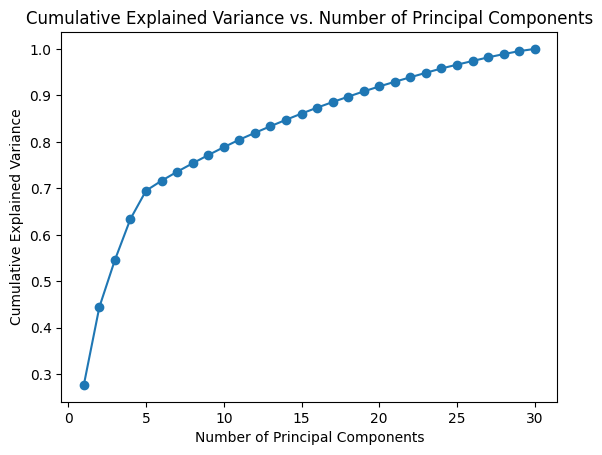

In [13]:
# Elbow Point
# Fit PCA to your dataset
pca = PCA().fit(df_microvan.drop(demographic_columns_mvliking, axis=1))

# Create the cumulative explained variance plot
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

When observing the cumulative explained variance plot, look for an "elbow" point where adding more components does not result in significant gains in explained variance. This point may indicate a balance between model complexity and the amount of retained information.

Here, there are several methods for choosing the number of PCA components. In this case, I will choose 5 because the difference between 4 and 5 PCs is greater than between 5 and 6. We still retain around 70% of the variance explainability.

In [14]:
# We chose the number of components as 5
pca = PCA(n_components=5, random_state=42).fit(df_microvan.drop(demographic_columns_mvliking, axis=1))

f'So, with five components, we have {sum(pca.explained_variance_ratio_) * 100}% of explained variance!'

'So, with five components, we have 69.49209280291693% of explained variance!'

## <a>Analysis of Components</a>

Each component is created as a "part" of the original variables. In other words, the original variables make up the principal components (remember the projection: the component is the projection of these variables). But how do we know the impact of each variable on the final projection? There is an attribute in the PCA object that shows these values for us.

In [15]:
# Composition of the 5 components from the 30 questionnaire variables
pca.components_

array([[-1.54242523e-01, -2.81775831e-02, -2.77771856e-01,
         1.31120032e-02, -6.55592685e-02, -2.48789125e-01,
        -1.87212012e-01, -2.57534039e-01,  2.75945850e-02,
        -2.88168029e-01, -3.63932100e-02, -1.62540808e-01,
         1.67796640e-01, -4.41662433e-02, -5.51359745e-02,
        -6.95906332e-02,  2.91928208e-01, -1.70653306e-01,
        -2.48765321e-01, -1.12947539e-01, -1.64018658e-01,
         2.12266322e-01,  1.33568970e-01, -2.56185238e-01,
        -1.38779086e-01,  2.71164567e-01, -1.99131255e-01,
        -1.99116260e-02, -1.48933645e-01, -2.85564500e-01],
       [ 1.09807865e-03, -3.64988114e-01,  8.12541567e-02,
        -3.38909225e-01, -2.18792400e-04, -8.27943891e-02,
         7.97252373e-02,  6.19192696e-03,  1.47139293e-02,
         1.17792436e-02, -3.61515356e-01,  2.99948345e-01,
         1.51018703e-02, -3.46323846e-01, -3.61913246e-01,
         3.38353633e-01,  6.73537198e-02,  1.41603682e-02,
         7.29399128e-03,  7.47233603e-03, -5.49026164e-

Let's demonstrate that this array of numbers is, in fact, the composition of each component in relation to the original variables! We will also visualize the weights of each feature in the composition of the components graphically.

In [16]:
# Create a pandas dataframe with the column names of the questionnaires and input the components of each PCA listed above as data
df_component_composition = pd.DataFrame(columns=df_microvan.drop(demographic_columns_mvliking, axis=1).columns)

for i in range(5):
    df_component_composition.loc[i] = pca.components_[i]

df_component_composition

,kidtrans,miniboxy,lthrbetr,secbiggr,safeimpt,buyhghnd,pricqual,prmsound,perfimpt,tkvacatn,noparkrm,homlrgst,envrminr,needbetw,suvcmpct,next2str,carefmny,shdcarpl,imprtapp,lk4whldr,kidsbulk,wntguzlr,nordtrps,stylclth,strngwrn,passnimp,twoincom,nohummer,aftrschl,accesfun
0,-0.15,-0.03,-0.28,0.01,-0.07,-0.25,-0.19,-0.26,0.03,-0.29,-0.04,-0.16,0.17,-0.04,-0.06,-0.07,0.29,-0.17,-0.25,-0.11,-0.16,0.21,0.13,-0.26,-0.14,0.27,-0.20,-0.02,-0.15,-0.29
1,0.00,-0.36,0.08,-0.34,-0.00,-0.08,0.08,0.01,0.01,0.01,-0.36,0.30,0.02,-0.35,-0.36,0.34,0.07,0.01,0.01,0.01,-0.01,-0.01,0.04,-0.11,0.13,0.01,-0.06,-0.32,0.05,0.01
2,0.37,-0.05,-0.04,0.01,0.30,-0.07,-0.10,-0.06,-0.31,-0.08,0.02,-0.04,0.27,-0.00,0.08,0.02,0.06,-0.23,0.05,0.22,0.29,0.23,-0.34,-0.11,0.20,-0.01,-0.08,0.05,0.37,-0.05
3,0.31,-0.07,0.03,0.04,-0.44,-0.06,-0.02,-0.01,0.42,0.04,-0.00,-0.00,0.11,-0.05,0.05,0.07,0.01,-0.13,-0.02,-0.42,0.25,0.05,-0.26,0.03,-0.34,-0.11,-0.08,-0.02,0.18,0.07
4,-0.13,0.03,0.08,-0.07,-0.03,0.30,0.42,0.08,0.08,-0.05,0.11,-0.07,0.41,0.02,-0.04,0.17,-0.09,-0.42,-0.07,-0.03,-0.12,0.29,0.16,-0.04,0.03,-0.03,0.39,0.03,-0.02,0.01


Here we can see that we have the 5 PCs in the rows with 30 columns representing the weight that each variable has for each PC

In [17]:
# For each component, let's choose the highest positive influence and the highest negative influence
# Not forgetting that in the negative influence, we need to negate the statement
for i in range(5):
    column_max = df_component_composition.columns[df_component_composition.loc[i].argmax()]
    column_min = df_component_composition.columns[df_component_composition.loc[i].argmin()]

    print(f'Component {i+1} positive impact: "{data_dictionary[column_max]}" and negative impact: "{data_dictionary[column_min]}"\n\n')

Component 1 positive impact: "We are careful with money." and negative impact: "We try to take as many vacations as possible."


Component 2 positive impact: "My next car will be a two-seater." and negative impact: "Current minivans are just too boxy and large."


Component 3 positive impact: "We engage in more after-school activities than most families." and negative impact: "We don't take family trips."


Component 4 positive impact: "Performance is very important in a car." and negative impact: "Car safety is very important to me."


Component 5 positive impact: "Car prices strongly reflect the underlying production quality." and negative impact: "I think everyone should carpool or use public transportation."




#### <a>Graphically Analyzing the Weights of Each Variable in the Principal Components</a>

<Axes: >

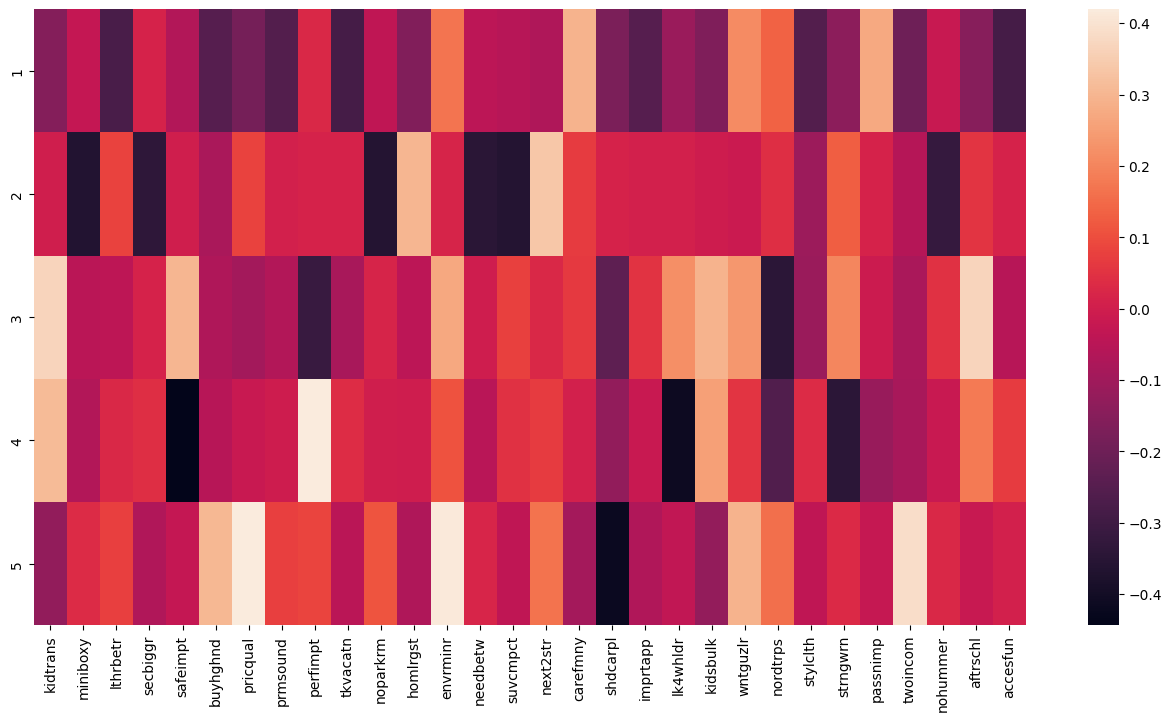

In [18]:
# Heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(data=df_component_composition, yticklabels=df_component_composition.index+1)

To facilitate later understanding and have a more mnemonic name than just component 1 and 2; we can create "names" for the components according to their characteristics. This will be useful when we do clustering analysis in the next project!

- Component 1: **Close-fisted without vacations!**
- Component 2: **We like tight cars!**
- Component 3: **Family is what matters!**
- Component 4: **Fast and Furious!**
- Component 5: **I pay a lot for a good car and don't care about pollution!**

Despite the names and jokes, it is important to recognize component characteristics to support marketing campaigns. Understanding the components gives us an idea of which variables have similar variability, which in questionnaires really brings together those variables that are more similar.

Finally, let's transform our original dataframe with the components we created?

In [19]:
# Now let's effectively transform the 30 variables into the 5 components
principal_components_microvan = pca.transform(df_microvan.drop(demographic_columns_mvliking, axis=1))
principal_components_microvan

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])

# Project 5 begins here! 
## Let's create the customer segmentation

In [20]:
# Remembering that we have the questionnaire "transformed" into 5 principal components
# Each row in this array represents a customer who answered the questionnaire, with the values of each of the 5 components
principal_components_microvan

array([[ 4.95739724, -0.630778  ,  0.25397408,  4.53413096,  0.4787577 ],
       [-0.42529226, -4.57730748, -2.68257259, -2.62292284, -0.50422577],
       [-4.20223653,  5.99835902,  2.46455968,  1.54782301, -2.41202492],
       ...,
       [-6.4115679 , -4.47822563, -6.6555251 , -0.29161379, -1.62472682],
       [-3.57270499, -5.5292335 ,  0.25267482,  2.61167859, -1.04362801],
       [ 4.05034892,  2.45977589,  3.75878157, -0.49039215,  0.74268315]])

#### Example: Row 1 is a customer who answered the questionnaire and has principal component 1 with a value of 4.9, meaning a strong positive value for "Close-fisted without vacations" and a value of 4.5 for "Close-fisted without vacations" :)

In [21]:
# Now that we have the components, let's append the columns to the customers to have the complete data
# First, transforming the array into a dataframe to include the correct names of the components
component_names = ['Close-fisted', 'tight_cars', 'family', 'fast_furious', 'expensive_car']

df_principal_components_microvan = pd.DataFrame(principal_components_microvan, columns=component_names, index=df_microvan.index)
df_principal_components_microvan.head()

,Close-fisted,tight_cars,family,fast_furious,expensive_car
subjnumb,,,,,
1,4.96,-0.63,0.25,4.53,0.48
2,-0.43,-4.58,-2.68,-2.62,-0.50
3,-4.20,6.00,2.46,1.55,-2.41
4,4.89,-0.93,-0.76,-3.58,3.52
5,0.12,5.55,-1.02,0.07,-0.84


In [22]:
# Finally, append to the original data (without the questionnaires, as we have replaced them with principal components)
demographic_columns_mvliking

df_complete = pd.concat([df_microvan.loc[:, demographic_columns_mvliking], df_principal_components_microvan], axis=1)
df_complete.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Close-fisted,tight_cars,family,fast_furious,expensive_car
subjnumb,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84


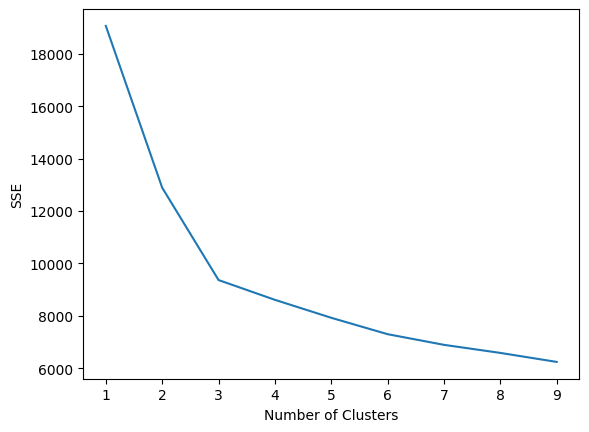

In [23]:
# Now that we have our complete dataframe, let's create the clusters
from sklearn.cluster import KMeans

# Suppress specific FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster._kmeans")

# We will use the SSE (Sum of Squares Error) metric that calculates the square of the distance from each point to its centroid
# and sums it all up! In other words, the more "spread out" the clusters are, the higher the error (clusters close together is better with low SSE)
sse = {}

# Let's use the elbow graph using the SSE metric ranging from 1 to 9 clusters
for num_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000, ).fit(df_complete.loc[:, component_names])

    # Inertia: Sum of distances between observations and the center of their cluster
    sse[num_clusters] = kmeans.inertia_ 
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Based on the elbow graph heuristic, let's choose 3 clusters to have less complexity when interpreting the cluster results.

In [56]:
# Choosing the number of clusters and fitting
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(df_complete.loc[:, component_names])

# Including the information on which cluster each observation belongs
df_complete["clusters"] = kmeans.labels_+1 # Transform cluster 0, 1 and 2 to 1, 2 and 3
df_complete.head()

# Restore warning
warnings.filterwarnings("default", category=FutureWarning, module="sklearn.cluster._kmeans")

/Users/andrawsstevesantos/venv/projeto5/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [25]:
# Where are the centroids located?
kmeans.cluster_centers_

array([[ 4.82314353e+00, -1.73590358e-01,  2.61090894e-01,
        -8.41311457e-02, -3.96639111e-02],
       [-2.90701573e+00,  3.72889618e+00, -3.28091713e-01,
         1.28196550e-01,  1.43814440e-01],
       [-3.48849845e+00, -3.91200832e+00,  1.35259023e-03,
        -2.54746462e-02, -1.04893614e-01]])

In [59]:
# Creating a pandas dataframe with the centroids and the names of the principal components from the PCA project
df_centroids = pd.DataFrame(data=kmeans.cluster_centers_, columns=component_names, index=[1, 2, 3])
df_centroids

,Close-fisted,tight_cars,family,fast_furious,expensive_car
1,-2.91,3.76,-0.34,0.12,0.11
2,4.82,-0.17,0.26,-0.08,-0.04
3,-3.48,-3.88,0.01,-0.01,-0.07


In [64]:
# First cluster (tight_cars group)
df_cluster1 = df_complete.loc[df_complete['clusters'] == 1]
df_cluster1.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Close-fisted,tight_cars,family,fast_furious,expensive_car,clusters
subjnumb,,,,,,,,,,,,,,
3,51,72,22,2,1,3,3,3,-4.20,6.00,2.46,1.55,-2.41,1
5,40,75,17,1,1,3,4,1,0.12,5.55,-1.02,0.07,-0.84,1
6,43,94,16,0,0,3,5,2,-3.41,8.46,-3.38,-1.64,-1.34,1
9,38,129,20,1,0,3,2,5,-3.82,4.41,-0.15,1.17,1.07,1
12,43,136,17,0,0,3,1,3,-2.17,4.27,0.15,1.24,2.22,1


In [65]:
# Second cluster (close-fisted group)
df_cluster2 = df_complete.loc[df_complete['clusters'] == 2]
df_cluster2.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Close-fisted,tight_cars,family,fast_furious,expensive_car,clusters
subjnumb,,,,,,,,,,,,,,
1,34,59,14,1,0,1,3,4,4.96,-0.63,0.25,4.53,0.48,2
4,32,42,12,0,0,3,2,3,4.89,-0.93,-0.76,-3.58,3.52,2
8,29,39,16,1,0,2,2,4,4.29,-1.27,2.10,-2.66,0.53,2
10,26,26,11,0,0,2,3,3,8.11,1.87,-1.86,-1.12,-0.59,2
11,31,20,12,0,1,3,3,1,5.16,-2.38,2.59,-3.28,0.27,2


In [66]:
# Third cluster (not tight_cars group)
df_cluster3 = df_complete.loc[df_complete['clusters'] == 3]
df_cluster3.head()

,age,income,miles,numkids,female,educ,recycle,mvliking,Close-fisted,tight_cars,family,fast_furious,expensive_car,clusters
subjnumb,,,,,,,,,,,,,,
2,36,79,16,1,0,3,4,6,-0.43,-4.58,-2.68,-2.62,-0.50,3
7,47,38,26,2,1,4,3,8,-3.95,-4.49,2.79,-0.14,-0.11,3
15,52,119,28,3,1,3,3,6,-6.21,-5.45,1.31,-0.02,-0.12,3
16,39,28,29,2,1,4,3,6,-3.66,-4.64,4.12,-2.77,-2.56,3
17,43,113,17,0,0,4,4,9,-4.10,-4.96,-5.54,-2.71,2.03,3


In [68]:
# Number of people per cluster
df_complete['clusters'].value_counts().sort_index()

clusters
1    126
2    159
3    115
Name: count, dtype: int64

In [69]:
# Basic statistics
df_cluster1.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Close-fisted,tight_cars,family,fast_furious,expensive_car,clusters
count,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00,126.00
mean,46.02,103.37,18.46,1.21,0.56,3.27,3.08,4.37,-2.91,3.76,-0.34,0.12,0.11,1.00
std,5.96,43.73,3.55,0.99,0.50,0.65,1.18,2.54,1.86,1.54,2.65,2.41,2.00,0.00
min,31.00,41.00,10.00,0.00,0.00,1.00,1.00,1.00,-7.44,0.01,-6.20,-6.34,-4.31,1.00
25%,42.00,73.00,16.00,0.25,0.00,3.00,2.00,2.00,-4.16,2.79,-2.32,-1.63,-1.28,1.00
50%,46.00,94.50,18.00,1.00,1.00,3.00,3.00,4.00,-2.67,3.68,-0.13,0.27,-0.03,1.00
75%,51.00,126.00,21.00,2.00,1.00,4.00,4.00,6.00,-1.75,4.75,1.47,1.54,1.26,1.00
max,60.00,273.00,27.00,4.00,1.00,4.00,5.00,9.00,1.28,8.46,5.46,7.34,6.33,1.00


In [70]:
# Basic statistics
df_cluster2.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Close-fisted,tight_cars,family,fast_furious,expensive_car,clusters
count,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00,159.00
mean,32.15,36.65,14.61,0.67,0.48,2.05,2.99,3.91,4.82,-0.17,0.26,-0.08,-0.04,2.00
std,5.30,16.33,3.56,0.76,0.50,0.77,1.13,2.48,1.90,1.77,2.54,2.47,2.17,0.00
min,19.00,15.00,7.00,0.00,0.00,1.00,1.00,1.00,1.20,-5.24,-5.78,-5.29,-5.83,2.00
25%,28.00,25.00,12.00,0.00,0.00,1.00,2.00,2.00,3.52,-1.24,-1.47,-1.79,-1.50,2.00
50%,32.00,32.00,15.00,1.00,0.00,2.00,3.00,4.00,4.60,-0.32,0.27,-0.22,-0.07,2.00
75%,36.00,45.00,17.00,1.00,1.00,3.00,4.00,6.00,5.97,1.06,2.05,1.45,1.51,2.00
max,48.00,131.00,24.00,4.00,1.00,3.00,5.00,9.00,10.33,4.33,6.87,5.90,5.45,2.00


In [71]:
# Basic statistics
df_cluster3.describe()

,age,income,miles,numkids,female,educ,recycle,mvliking,Close-fisted,tight_cars,family,fast_furious,expensive_car,clusters
count,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00,115.00
mean,44.44,83.99,22.33,1.98,0.59,3.34,3.07,6.65,-3.48,-3.88,0.01,-0.01,-0.07,3.00
std,5.76,33.43,4.04,1.11,0.49,0.66,1.24,2.22,1.96,1.60,2.76,2.53,1.93,0.00
min,31.00,28.00,14.00,0.00,0.00,2.00,1.00,1.00,-9.12,-7.18,-6.66,-7.18,-4.86,3.00
25%,40.50,59.50,19.00,1.00,0.00,3.00,2.00,5.00,-4.79,-5.17,-1.79,-1.63,-1.47,3.00
50%,44.00,79.00,22.00,2.00,1.00,3.00,3.00,7.00,-3.33,-3.89,-0.07,-0.00,-0.13,3.00
75%,48.00,108.50,25.50,3.00,1.00,4.00,4.00,9.00,-2.09,-2.81,2.04,1.41,1.05,3.00
max,58.00,168.00,32.00,4.00,1.00,4.00,5.00,9.00,0.72,-0.04,7.07,6.62,5.26,3.00


From these statistics, we can draw many important conclusions about the average age, income, number of children, etc., of each group (cluster).

## Let's better understand the clusters

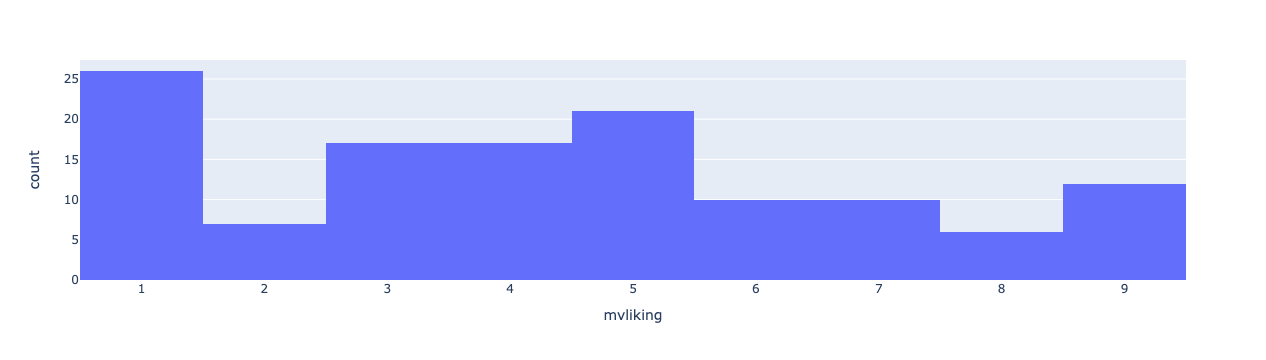

In [72]:
# Now let's see the relationship between the response variable 'mvliking' and cluster 1
import plotly.express as px

fig = px.histogram(data_frame=df_cluster1, x='mvliking')
fig.show()

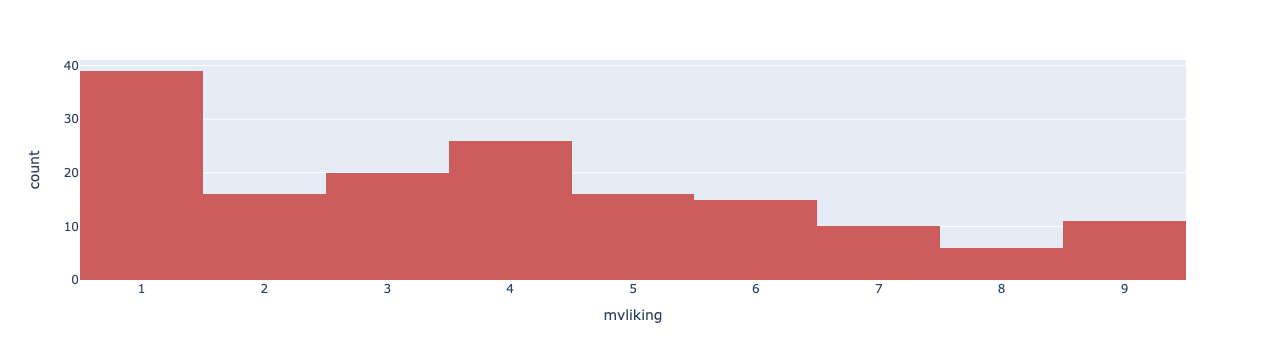

In [73]:
# Now let's see the relationship between the response variable 'mvliking' and cluster 2
fig = px.histogram(data_frame=df_cluster2, x='mvliking', color_discrete_sequence=['indianred'])
fig.show()

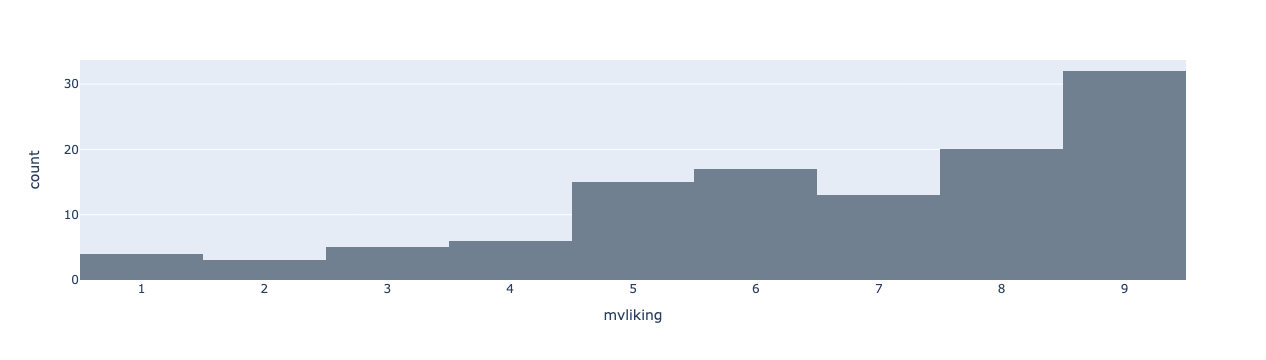

In [74]:
# Now let's see the relationship between the response variable 'mvliking' and cluster 3
fig = px.histogram(data_frame=df_cluster3, x='mvliking', color_discrete_sequence=['slategray'])
fig.show()

We observe that in cluster 3, we have a large portion of good ratings, unlike clusters 1 and 2.

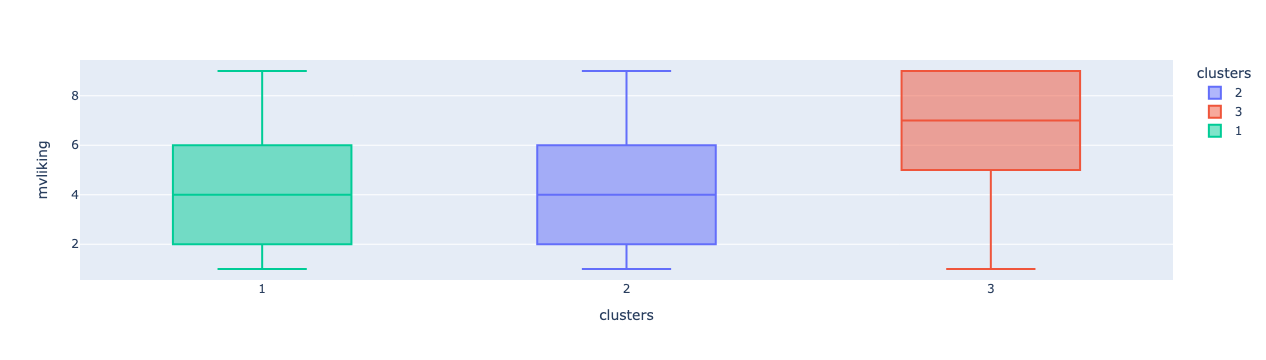

In [75]:
# Let's visualize the 3 clusters side by side
fig = px.box(data_frame=df_complete, x='clusters', y='mvliking', color='clusters')
fig.show()

We observe that in cluster 3, we have a median of 7, meaning 50% of the people in this group gave a rating of 7 or higher to the minivan. Therefore, this could be an interesting group, a target audience for the minivan.

### Demographic analusis

In [78]:
# Demographic columns and mvliking
df_demographic = df_complete.iloc[:, :8]
df_demographic.head()

,age,income,miles,numkids,female,educ,recycle,mvliking
subjnumb,,,,,,,,
1,34,59,14,1,0,1,3,4
2,36,79,16,1,0,3,4,6
3,51,72,22,2,1,3,3,3
4,32,42,12,0,0,3,2,3
5,40,75,17,1,1,3,4,1


<Axes: >

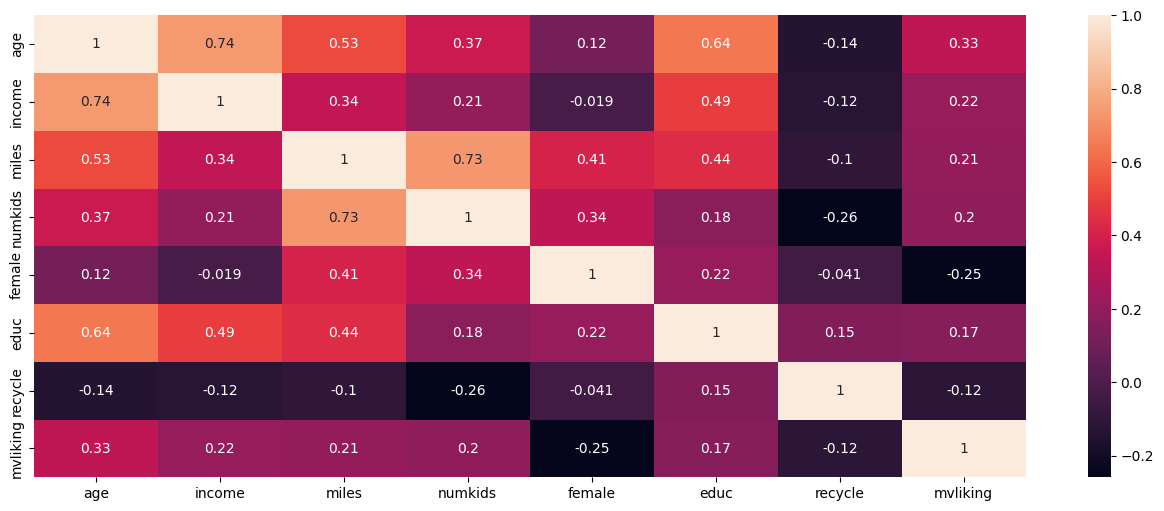

In [79]:
# Relationship between demographic variables and the variable mvliking (liking or not)
demographic_correlations = df_demographic.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(data=demographic_correlations, annot=True)

We observe that we do not have very strong correlations between demographic variables and mvlinking, but age has an interesting influence. We can see that women tend to not like the minivan as much. Let's continue the analysis.

<Axes: xlabel='age'>

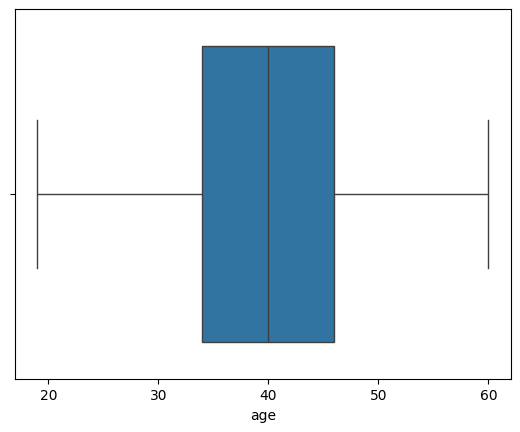

In [80]:
# Age analysis
sns.boxplot(data=df_demographic, x='age')

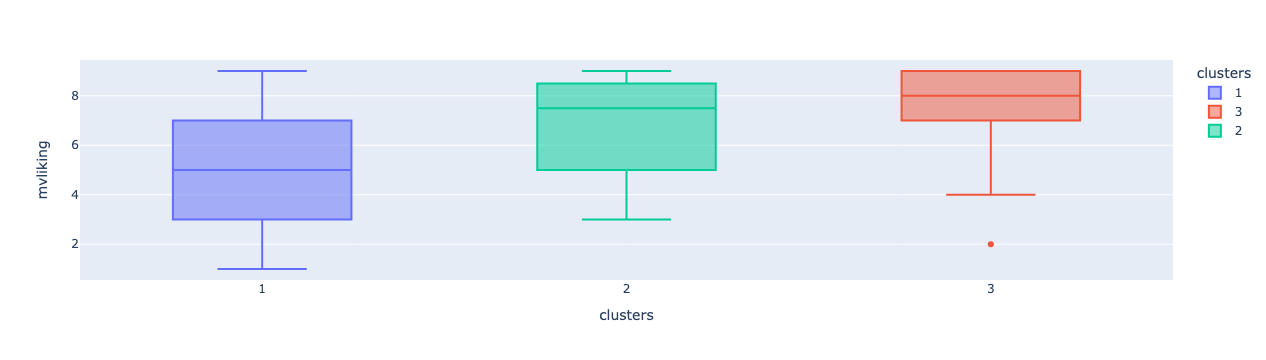

In [81]:
# Since we saw that age and gender are the two variables that have the most influence on the mvliking variable
#(liking the minivan), let's create the histograms again, but now for age above 40 (median) and male gender (female had a negative weight of -0.25).
df1 = df_complete.loc[(df_complete['age'] >= 40) & 
                      (df_complete['female'] == False), :]

fig = px.box(data_frame=df1, 
             x='clusters', 
             y='mvliking', color='clusters')
fig.show()

We can see that with these filters, we were able to increase the median in all 3 clusters, especially in the second and third. In the second cluster, we have a median of 7 but still some median ratings (it is interesting to consider this group, with these demographic filters, for potential minivan buyers). In the third group, we have an increase in the median to 8, with the first quartile equal to 7; therefore, this group is very interesting as the main target for the minivan.

In [84]:
# Number of men over 40 years old in cluster 3
num_men_40 = len(df_complete.loc[(df_complete['age'] >= 40) & 
                                 (df_complete['female'] == False) & 
                                 (df_complete['clusters'] == 3), :])
num_men_40

35

In [85]:
# Percentage in the group
100 * num_men_40 / len(df_complete)

8.75

In [86]:
# Recall the centroids
df_centroids

,Close-fisted,tight_cars,family,fast_furious,expensive_car
1,-2.91,3.76,-0.34,0.12,0.11
2,4.82,-0.17,0.26,-0.08,-0.04
3,-3.48,-3.88,0.01,-0.01,-0.07


# Conclusion

Notice how much valuable business knowledge we gained! We segmented the customers into clusters, using PCA to reduce the number of questionnaire questions. We discovered a cluster more likely to buy our minivan!

But now we already know a good way to segment customers! The characteristics of cluster 3 combined with the strongest components of this cluster provide a much better understanding of the types of customers that will be the focus of a marketing campaign. These insights, combined with demographic information, indicate that the focus should be more on males, aged over 40, who are willing to spend a lot on a car (negative inclination towards 'close-fisted') and appreciate ample space (negative inclination towards 'tight_cars').

I hope I have been helpful. If you have any further questions, feel free to ask anytime!